# Projet développement logiciel - HMMA 238



  ### TP°1

   #### Ryma Lakehal

## Exercice 1 - Le jeu de la vie

In [1]:
filename = "HMMA238_TP_rymalakehal.ipynb"

taille_str = len(filename)
print(taille_str)

ma_graine = taille_str % 6
print("ma graine est :", ma_graine)

28
ma graine est : 4


## Implémentation sans numpy

Par la suite, les fonctions définies sont placées dans un fichier **utils.py** que l'on appellera depuis le notebook.

On va fournir ci-dessous le code Python pour coder ce jeu. Dans la suite on va coder les cellules vivantes par des 1 et les cellules mortes par des 0.   

Tout d'abord on définit la fonction **calcul_nb_voisins** :

In [2]:
from utils import calcul_nb_voisins

Appliquons la fonction précédente à la liste **Z** suivante :

In [3]:
Z = [[0,0,0,0,0,0],
     [0,0,0,1,0,0],
     [0,1,0,1,0,0],
     [0,0,1,1,0,0],
     [0,0,0,0,0,0],
     [0,0,0,0,0,0]]

N=calcul_nb_voisins(Z)
N

[[0, 0, 0, 0, 0, 0],
 [0, 1, 3, 1, 2, 0],
 [0, 1, 5, 3, 3, 0],
 [0, 2, 3, 2, 2, 0],
 [0, 1, 2, 2, 1, 0],
 [0, 0, 0, 0, 0, 0]]

la sortie obtenue **N=calcul_nb_voisins(Z)** représente le nombre de cellules voisines (huit) vivantes de chaque cellule, avec le partour de la grille est toujours inactif

On définit une fonction **iteration_jeu(Z)** et on l'applique à la liste **Z**

In [4]:
from utils import iteration_jeu
help(iteration_jeu)

Help on function iteration_jeu in module utils:

iteration_jeu(Z)
    Simulation d'un jeu de la vie 
    
    Arguments : 
    Z : 2D liste de listes composée de 0 et 1 d'un jeu de la vie donnée
        
    Cette fonction applique les regles du jeu de la vie de 'Conway':
    Toute cellule morte ayant exactement 3 voisins vivants on lui affecte la valeur 1.
    Toute cellule vivante ayant 0, 1 ou 4 voisins vivants meurt à la génération suivante, on lui affecte 0.
    Sinon la cellule garde la meme valeur.
    
    LA fonction 'iteration_jeu' realise une simulation d'un tour du jeu pour une liste Z donnée.



In [5]:
iteration_jeu(Z)

[[0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 1, 0],
 [0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0]]

Maintenant, on affiche les étapes du jeu de 0 à 9 itérations pour la liste **Z**. On utilisera la fonction **subplot** de **matplotlib** pour afficher sur 2 lignes et 5 colonnes ces 10 matrices.

Pour ce faire, on définit la fonction **iterations_steps** :

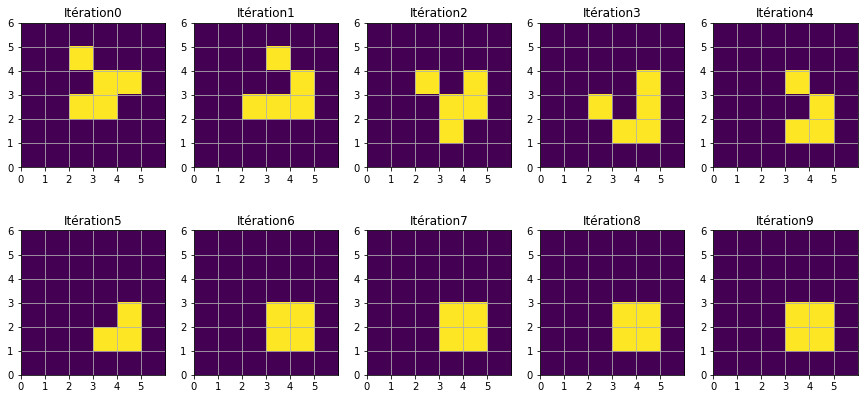

In [6]:
import matplotlib.pyplot as plt

from utils import iterations_steps
iterations_steps(Z)

Nous remarquons que l'itération 0 et 4 ont la même forme, et qu'entre ces deux itérations les cellules se déplacent au sens d'une aiguille d'une montre (de droite à gauche) pour revenir à leur états initials (itération 4)

Après l'itération 7, le nombre de cellules se stabilise à 4 cellules vivantes regroupées (cas **équlibre**).

## Implémentation avec numpy

On a le vecteur suivant :

In [7]:
import numpy as np

vect = np.array([0,1,0,0,1,1])
nb_vect = np.zeros(vect.shape)
nb_vect[1:-1] += (vect[:-2] + vect[2:])

In [8]:
nb_vect

array([0., 0., 1., 1., 1., 0.])

Le vecteur **nb_vect** calcule le nombre de voisins vivants dans le vecteur binaire **vect**, sans tenir compte des bords

On définit la fonction **calcul_nb_voisins_np**, cette fois sur des **array**, qui prend en entrée une matrice Z et qui ressort
le nombre de voisins pour chaque entrée (et qui vaut zéro sur le pourtour).

In [9]:
Z = np.asarray(Z)

from utils import calcul_nb_voisins_np
calcul_nb_voisins_np(Z)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 1, 2, 2, 0],
       [0, 0, 2, 3, 3, 0],
       [0, 0, 2, 3, 3, 0],
       [0, 0, 0, 0, 0, 0]])

On créera une fonction **iteration_jeu_np**, similaire à **iteration_jeu** mais qui prend comme entrée sortie des numpy array et non plus des listes de listes.

In [10]:
from utils import iteration_jeu_np
iteration_jeu_np(Z)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0]])

Maintenant, on définit fonction **jeu_np** qui prend en entrée une matrice initiale **Z_in** et un nombre d'itérations **nb_iter** et sort une matrice (de même taille que Z_in) décrivant l'état du jeu de la vie après nb_iter itérations.

In [11]:
from utils import jeu_np
jeu_np(Z, 8)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0]])

On crée un film qui représente l'évolution du jeu de la vie, quand on initialise avec la matrice **Z_huge**

In [12]:
Z_huge = np.zeros((100, 100))
Z_np = np.array(
    [[0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0],
     [0, 1, 0, 1, 0, 0],
     [0, 0, 1, 1, 0, 0],
     [0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0]])

Z_huge[10:16, 10:16] = Z_np

In [13]:
from matplotlib import animation 

<IPython.core.display.Javascript object>


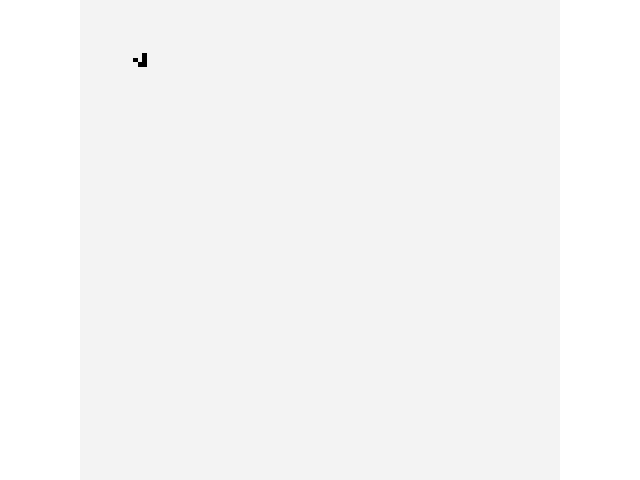

In [16]:
%matplotlib notebook



fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], xticks=[], yticks=[], frameon=False)
im = ax.imshow(Z, cmap=plt.cm.binary, interpolation='nearest')
im.set_clim(-0.05, 1)  # Make background gray

# initialization function: plot the background of each frame
def init():
    im.set_data(Z_huge)
    return (im,)

# animation function.  This is called sequentially
def animate():
    
    im.set_data(Z_huge)
    animate.Z = jeu_np(Z_huge,1)
    return im,

animate.Z = Z_huge
#plt.title("Film du  jeu de la vie", frontsize=police())
#plt.colorbar

MyAnimation = animation.FuncAnimation(fig, animate, init_func=init, frames=10, interval=30)


plt.show()

On reprend la question précédente en initialisant avec une matrice aléatoire de taille 100x100, remplie de 1 et de 0, et dont la proportion de 1 est égaleà *prop_active = (1 + ma_graine) * 10 / 100*

In [17]:
prop_active = (1 + ma_graine) * 10 / 100
prop_active

0.5

In [18]:
mat_init = np.random.choice([0,1], 100*100, p=[1-prop_active, prop_active]).reshape(100,100)
mat_init

array([[1, 1, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 1, 1, ..., 1, 1, 0],
       [0, 1, 1, ..., 1, 1, 0],
       [0, 0, 1, ..., 0, 1, 0]])

<IPython.core.display.Javascript object>


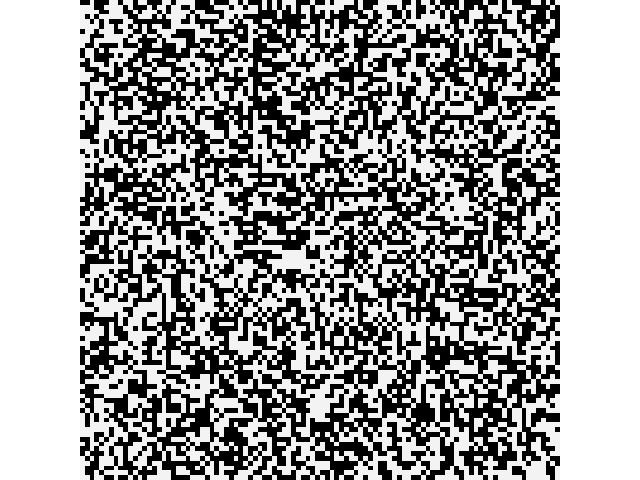

In [20]:
%matplotlib notebook



fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], xticks=[], yticks=[], frameon=False)
im = ax.imshow(Z, cmap=plt.cm.binary, interpolation='nearest')
im.set_clim(-0.05, 1)  # Make background gray

# initialization function: plot the background of each frame
def init2():
    im.set_data(mat_init)
    return (im,)

def animate2():
    
    im.set_data(mat_init)
    animate.Z = jeu_np(mat_init,1)
    return im,

animate.Z = mat_init

anim2 = animation.FuncAnimation(fig, animate2, init_func=init2, frames=10, interval=30)


plt.show()

On va créer trois matrices simples qui représentent des jeux qui sont fixes dans le temps et les afficher avec **plt.imshow**

Le "bloc" est un exemple de forme stable (d'autres formes stables existent), qui ne varie pas au fur et à mesure des générations. Il reste comme "gelé" à jamais ou jusqu'à ce qu'une forme mobile vienne le déranger.

La première matrice stable sera en frome de bloc
La première matrice stable sera en frome d'un double escalier
La première matrice stable sera en frome d'un losange

In [21]:
#FORME STABLE BLOC
mat_stable1 = np.zeros((50,50))

bloc1 = np.array([[1, 1], [1, 1]])
mat_stable1[10:12, 10:12] = mat_stable1[30:32, 30:32] = bloc1

# FORME STABLE ESCALIER
mat_stable2 = np.zeros((50,50))

bloc2 = np.array([[0,1,0,0], [1,0,1,0], [0,1,0,1],[0,0,1,0]])
mat_stable2[15:19, 15:19] = mat_stable2[35:39, 35:39] = bloc2

# FORME STABLE LOSANGE
mat_stable3 = np.zeros((50,50))

bloc3 = np.array([[0,1,0], [1,0,1], [0,1,0]])
mat_stable3[40:43, 40:43] = mat_stable3[20:23, 20:23] = bloc3

In [22]:
from utils import affiche 

<IPython.core.display.Javascript object>


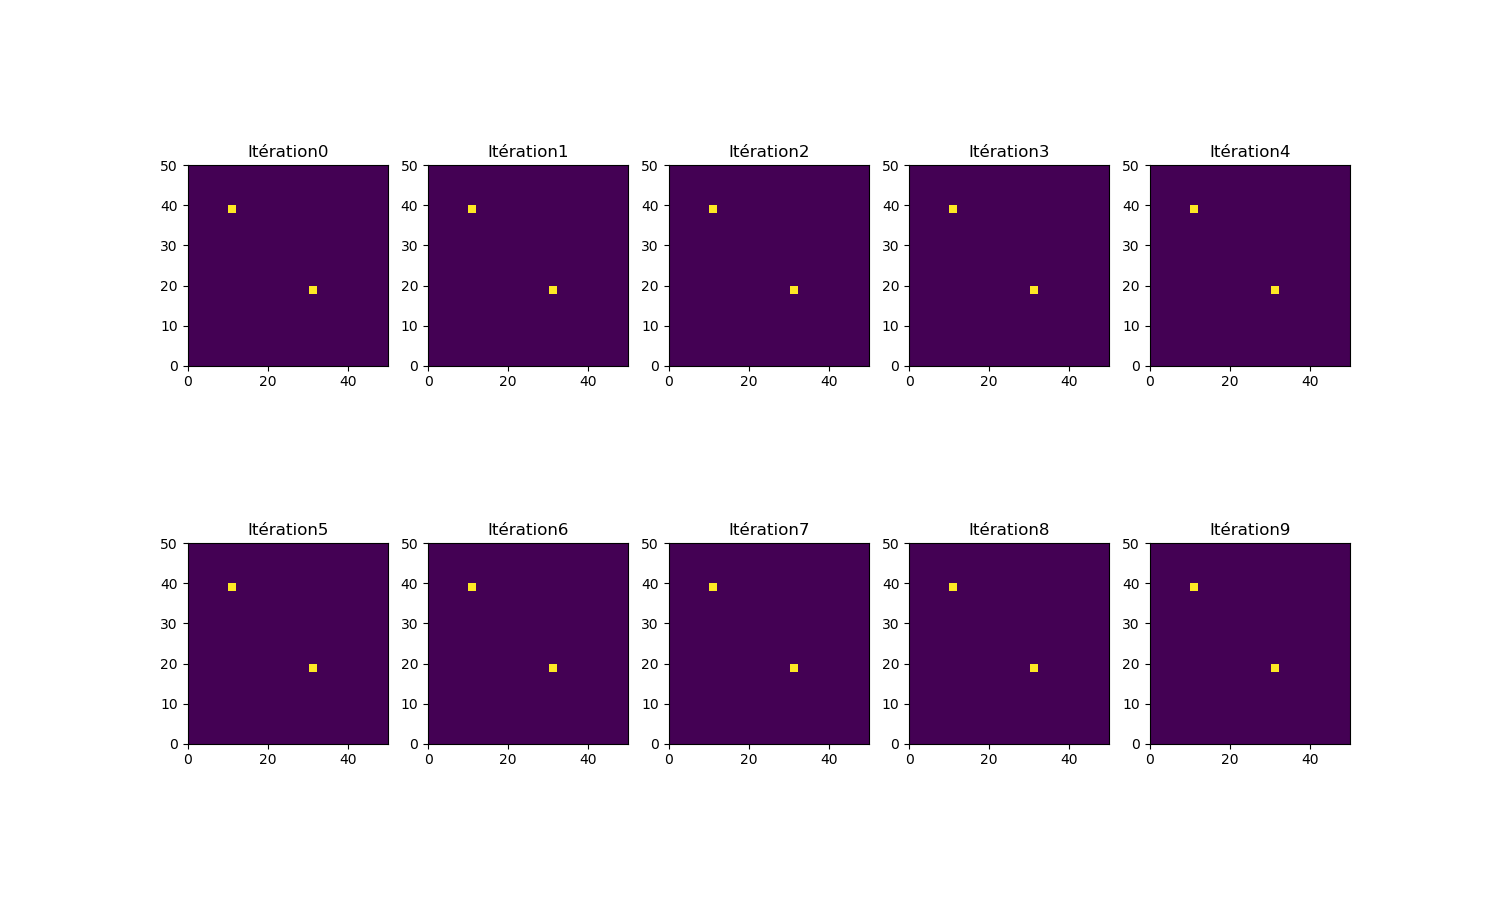

In [23]:
affiche(mat_stable1)

<IPython.core.display.Javascript object>


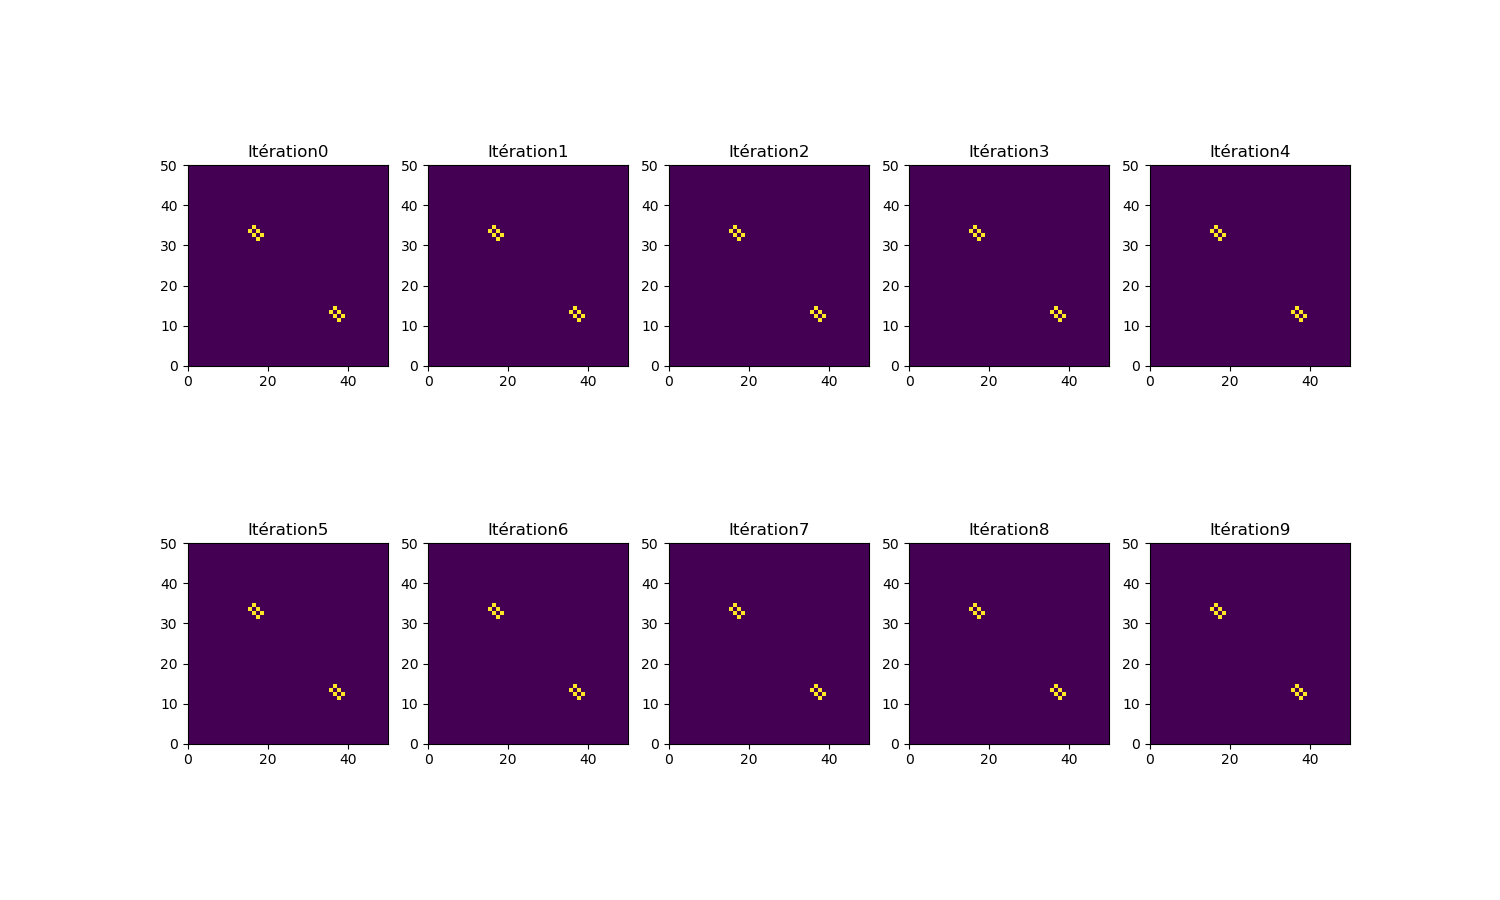

In [24]:
affiche(mat_stable2)

<IPython.core.display.Javascript object>


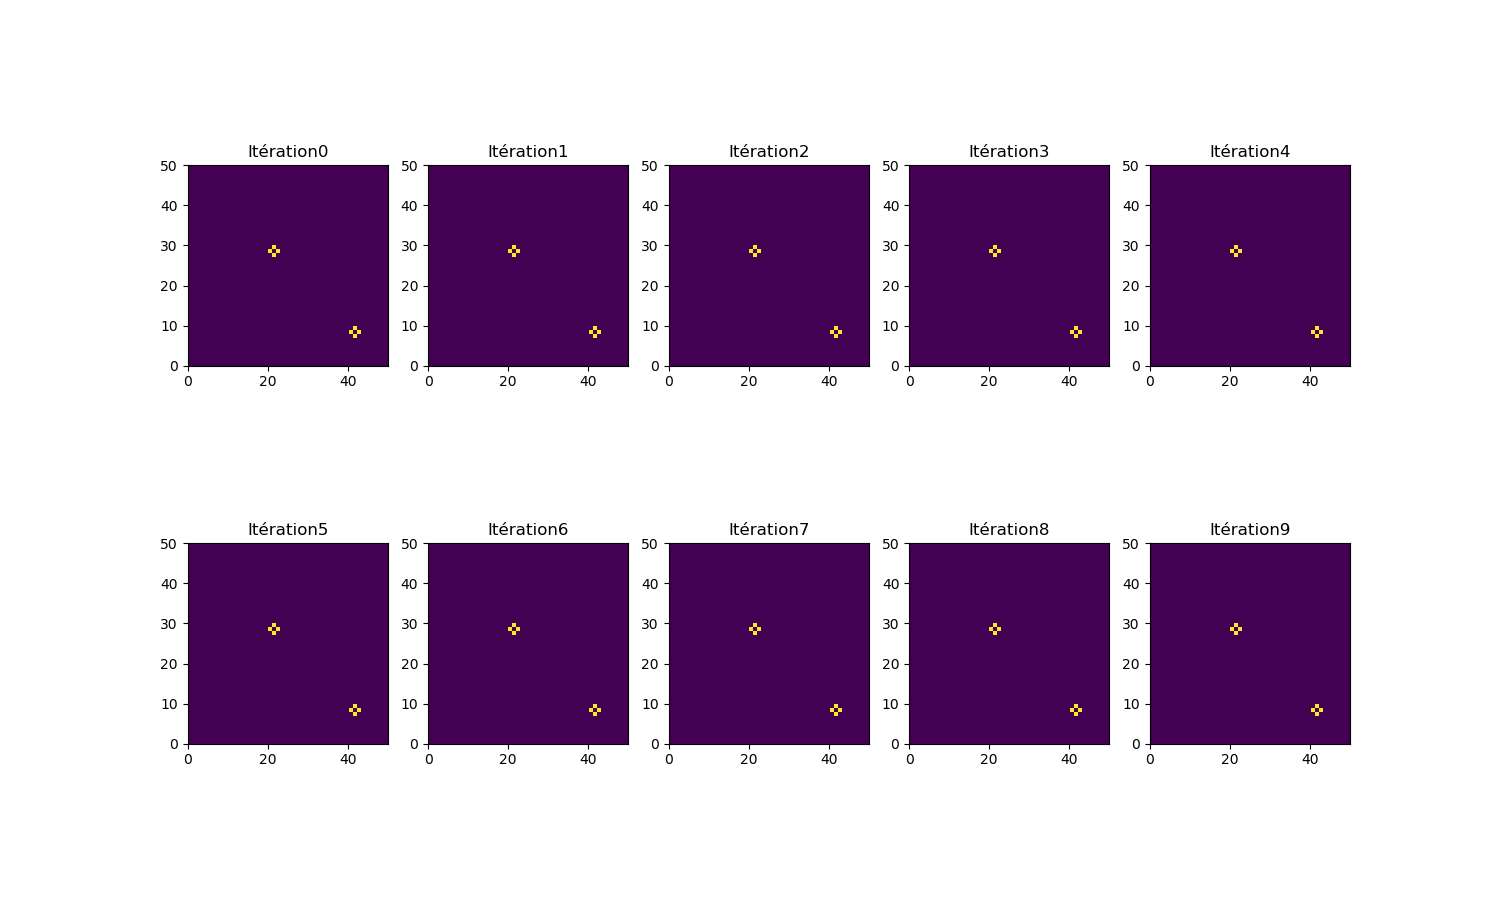

In [25]:
affiche(mat_stable3)

Maintenant, on va créer une matrice qui représente un jeu dont l'état oscille avec une période de deux 

In [26]:
#Forme le PHARE

mat_4 = np.zeros((50,50))

bloc4=np.zeros((4,4))
bloc4[0,2:4] = bloc4[1,2:4] = bloc4[2,0:2] = bloc4[3,0:2] = 1
mat_4[10:14, 10:14] = mat_4[25:29, 25:29] = mat_4[40:44, 40:44]= bloc4


<IPython.core.display.Javascript object>


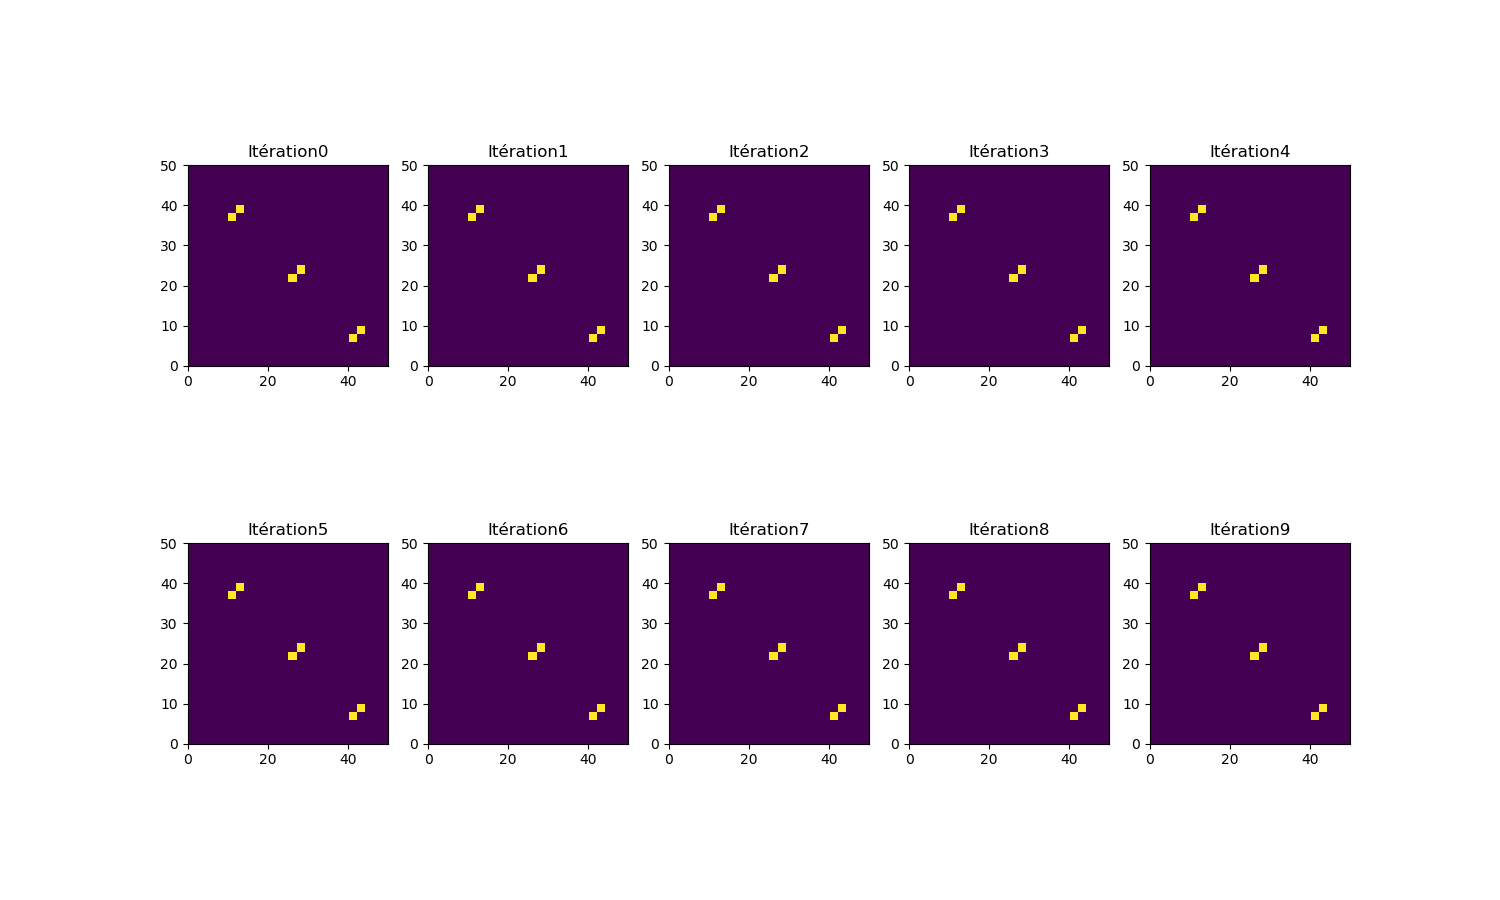

In [27]:
affiche(mat_4)